In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.1_classification/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [ ]:
logistic.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


In [ ]:
y_pred = logistic.predict(X)

In [ ]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

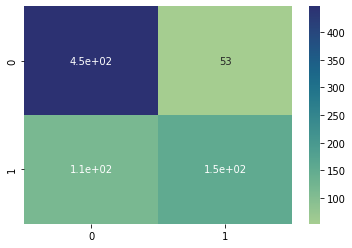

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred),cmap="crest", annot=True)

In [ ]:
logistic.score(X, y)

0.7825520833333334

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [ ]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
polynomial.score(poly, y)

0.7239583333333334

Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for solv in ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]:
  logistic = LogisticRegression(solver=solv, max_iter=500)
  logistic.fit(X_train, y_train)
  print(f"solver: {solv}, score = {logistic.score(X_test, y_test)}")

solver: lbfgs, score = 0.7467532467532467
solver: liblinear, score = 0.7597402597402597
solver: newton-cg, score = 0.7467532467532467
solver: newton-cholesky, score = 0.7467532467532467
solver: sag, score = 0.7337662337662337
solver: saga, score = 0.7142857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logistic = LogisticRegression(fit_intercept=False)
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

0.7272727272727273

In [ ]:
for c in range(1, 11):
  logistic = LogisticRegression(C=c/10, max_iter=500)
  logistic.fit(X_train, y_train)
  print(f"C= {c/10}, score = {logistic.score(X_test, y_test)}")

C= 0.1, score = 0.7337662337662337
C= 0.2, score = 0.7402597402597403
C= 0.3, score = 0.7402597402597403
C= 0.4, score = 0.7402597402597403
C= 0.5, score = 0.7402597402597403
C= 0.6, score = 0.7402597402597403
C= 0.7, score = 0.7467532467532467
C= 0.8, score = 0.7467532467532467
C= 0.9, score = 0.7467532467532467
C= 1.0, score = 0.7467532467532467


Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности

Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier

In [ ]:
models= [LogisticRegression(max_iter= 500 ), SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='sigmoid'), SVC(kernel='poly'),
         KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15),
         MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=200),
         MLPClassifier(hidden_layer_sizes=(150, ), activation='relu', solver='adam', alpha=0.0001, max_iter=500),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=42),
         BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
         PassiveAggressiveClassifier(max_iter=1000, random_state=42), RidgeClassifier(alpha=1.0, random_state=42)]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print(metrics.confusion_matrix(y_test, y_pred))
  print(f"score = {model.score(X_test, y_test)}")
  print()

LogisticRegression(max_iter=500)
[[78 21]
 [18 37]]
score = 0.7467532467532467

SVC()
[[87 12]
 [24 31]]
score = 0.7662337662337663

SVC(kernel='linear')
[[80 19]
 [19 36]]
score = 0.7532467532467533

SVC(kernel='sigmoid')
[[76 23]
 [46  9]]
score = 0.551948051948052

SVC(kernel='poly')
[[87 12]
 [25 30]]
score = 0.7597402597402597

KNeighborsClassifier()
[[70 29]
 [23 32]]
score = 0.6623376623376623

KNeighborsClassifier(n_neighbors=10)
[[86 13]
 [23 32]]
score = 0.7662337662337663

KNeighborsClassifier(n_neighbors=15)
[[84 15]
 [22 33]]
score = 0.7597402597402597

MLPClassifier()
[[81 18]
 [30 25]]
score = 0.6883116883116883

MLPClassifier(hidden_layer_sizes=(150,), max_iter=500)
[[75 24]
 [24 31]]
score = 0.6883116883116883

DecisionTreeClassifier()
[[78 21]
 [17 38]]
score = 0.7532467532467533

GaussianNB()
[[79 20]
 [16 39]]
score = 0.7662337662337663

RandomForestClassifier(random_state=42)
[[77 22]
 [21 34]]
score = 0.7207792207792207

BaggingClassifier(estimator=DecisionTreeCla

Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris())


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data["data"]
y = data["target"]

In [ ]:
models= [LogisticRegression(max_iter= 500 ), SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='sigmoid'), SVC(kernel='poly'),
         KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15),
         MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=200),
         MLPClassifier(hidden_layer_sizes=(150, ), activation='relu', solver='adam', alpha=0.0001, max_iter=500),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=42),
         BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
         PassiveAggressiveClassifier(max_iter=1000, random_state=42), RidgeClassifier(alpha=1.0, random_state=42)]
for model in models:
  model.fit(X, y)
  y_pred = model.predict(X)
  print(model)
  print(metrics.confusion_matrix(y, y_pred))
  print(f"score = {model.score(X, y)}")
  print()

LogisticRegression(max_iter=500)
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
score = 0.9733333333333334

SVC()
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
score = 0.9733333333333334

SVC(kernel='linear')
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
score = 0.9933333333333333

SVC(kernel='sigmoid')
[[10  0 40]
 [40  0 10]
 [49  0  1]]
score = 0.07333333333333333

SVC(kernel='poly')
[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
score = 0.9733333333333334

KNeighborsClassifier()
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
score = 0.9666666666666667

KNeighborsClassifier(n_neighbors=10)
[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
score = 0.98

KNeighborsClassifier(n_neighbors=15)
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
score = 0.9866666666666667

MLPClassifier()
[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
score = 0.98



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150,), max_iter=500)
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
score = 0.98

DecisionTreeClassifier()
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
score = 1.0

GaussianNB()
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
score = 0.96

RandomForestClassifier(random_state=42)
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
score = 1.0

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
score = 1.0

PassiveAggressiveClassifier(random_state=42)
[[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]
score = 0.96

RidgeClassifier(random_state=42)
[[50  0  0]
 [ 0 33 17]
 [ 0  5 45]]
score = 0.8533333333333334

